In [1]:
# Some basic setup:
# Setup detectron2 logger
import argparse
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

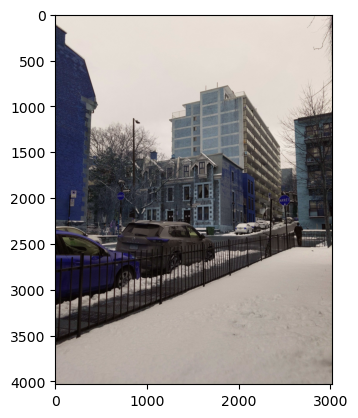

In [2]:
img = cv2.imread("/Users/jamesdarby/Documents/McGill/ECSE 415 Computer Vision/CompVisA4/mtl_street_scene.jpg")
plt.imshow(img)

In [3]:
cfg = get_cfg()
cfg.merge_from_file("../configs/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# print(cfg)

In [4]:
def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    # To use demo for Panoptic-DeepLab, please uncomment the following two lines.
    # from detectron2.projects.panoptic_deeplab import add_panoptic_deeplab_config  # noqa
    # add_panoptic_deeplab_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # Set score_threshold for builtin models
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = (
        args.confidence_threshold
    )
    cfg.freeze()
    return cfg

In [7]:
args = argparse.ArgumentParser(description="Detectron2 demo for builtin configs")

args.config_file = "../configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
args.config_file = "../configs/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
# args.config_file = "../configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
args.input = ["/Volumes/16TB_RAID_0/Scroll4/PHerc1667.volpkg/volumes/20231107190228/05000.tif", 
                "/Volumes/16TB_slow_RAID_0/Scroll3/PHerc0332.volpkg/volumes/20231027191953/05000.tif",
                "/Volumes/16TB_RAID_0/Scroll4/PHerc1667.volpkg/volumes/20231117161658/02000.tif",
                "/Users/jamesdarby/Documents/McGill/ECSE 415 Computer Vision/CompVisA4/mtl_street_scene.jpg"]
# args.input = ["/Volumes/16TB_RAID_0/Scroll4/PHerc1667.volpkg/volumes/20231117161658/02000.tif"]
args.output = f"/Users/jamesdarby/Desktop/detect-a-scroll/"
args.opts = ["MODEL.WEIGHTS", "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"]
args.opts = ["MODEL.WEIGHTS", "../weights/model_final_f6e8b1.pkl"] #mask_rcnn_R_101_FPN_3x.yaml weights
# args.opts = ["MODEL.WEIGHTS", "../weights/model_final_cafdb1.pkl"] #panoptic_fpn_R_101_3x.yaml weights
args.confidence_threshold = 0.5
print("Arguments:", args)

cfg = setup_cfg(args)
print("Config:", cfg)

Arguments: ArgumentParser(prog='ipykernel_launcher.py', usage=None, description='Detectron2 demo for builtin configs', formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)
Config: CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('coco_2017_val',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME

In [8]:
predictor = DefaultPredictor(cfg)


[03/16 11:21:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ../weights/model_final_f6e8b1.pkl ...


: 

In [ ]:
outputs = predictor(img)